<a href="https://colab.research.google.com/github/navyadua/christu-ug/blob/main/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/navyadua/data/main/hotel_booking_demand.csv')
dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,314,2015,August,35,27,0,2,2,0,0,BB,PRT,Groups,TA/TO,1,1,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,62.80,0,0,Canceled,17-10-2014
1,City Hotel,0,170,2017,August,31,5,0,1,2,0,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,130.50,0,1,Check-Out,06-08-2017
2,City Hotel,0,30,2015,October,41,8,0,0,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,0,No Deposit,50.0,NaN,0,Transient,0.00,0,0,Check-Out,08-10-2015
3,City Hotel,1,323,2015,September,36,5,2,2,2,0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,62.00,0,0,Canceled,06-07-2015
4,Resort Hotel,0,288,2015,September,36,2,1,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,240.0,NaN,0,Transient-Party,110.70,0,0,Check-Out,07-09-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,City Hotel,0,111,2017,June,25,21,0,3,2,0,0,BB,AUS,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,0,Check-Out,24-06-2017
496,City Hotel,0,97,2017,April,17,25,0,3,2,0,0,HB,FRA,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,28.0,NaN,0,Transient,115.00,0,0,Check-Out,28-04-2017
497,Resort Hotel,0,124,2017,March,13,26,2,4,1,0,0,BB,PRT,Online TA,TA/TO,0,0,1,A,C,1,No Deposit,241.0,NaN,0,Transient,27.07,0,0,Check-Out,01-04-2017
498,City Hotel,0,151,2016,January,4,19,0,2,1,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,D,2,No Deposit,19.0,NaN,63,Transient-Party,71.00,0,0,Check-Out,21-01-2016


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


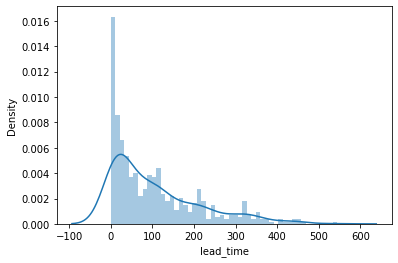

In [ ]:
sns.distplot(dataset['lead_time'] , bins = 50);

##Testing of Hypothesis for single mean.



In [ ]:
from scipy.stats import ttest_1samp

ttest, pval = ttest_1samp(dataset['lead_time'], 10)
print('p-values', pval)
if pval <0.05:
  print("We are rejecting null hypothesis")
else:
  print("We are accepting null hypothesis")

p-values 6.641222208697717e-65
We are rejecting null hypothesis


##Testing of hypothesis for comparison of means


In [ ]:
from scipy.stats import ttest_ind
city = list(dataset[dataset['hotel']=='City Hotel'].lead_time)
resort = list(dataset[dataset['hotel']=='Resort Hotel'].lead_time)
ttest,pval = ttest_ind(city, resort)
print(pval)
if pval < 0.05:
  print("We reject null hypothesis")
else:
  print("We accept null hypothesis")

0.00040175304547050694
We reject null hypothesis


##Chi-square test for independence of attributes


In [ ]:
from scipy import stats
contingency_table = pd.crosstab(dataset['is_canceled'],dataset['arrival_date_month'])
Observed_Values = contingency_table.values
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
no_of_rows = len(contingency_table.iloc[0:2, 0])
no_of_columns = len(contingency_table.iloc[0, 0:2])
ddof = (no_of_rows-1) * (no_of_columns-1)

In [ ]:
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]

In [ ]:
critical_value = chi2.ppf(q=1-0.05, df=ddof)
p_value = 1-chi2.cdf(x = chi_square_statistic, df = ddof)
if chi_square_statistic>=critical_value:
  print("Reject H0. There is a relationship between Cancellation and Lead Time")
else :
  print("Retain H0. There is no relationship between  Cancellation and Lead Time")

Retain H0. There is no relationship between  Cancellation and Lead Time
